In [2]:
# import some librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [3]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Data Analysis

In [4]:
df.duplicated().sum()
print(f"Number of duplicated rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of duplicated rows: 3854


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# EDA

## Data Visualisation

### Univariate Analysis

diabetes
0    91500
1     8500
Name: count, dtype: int64


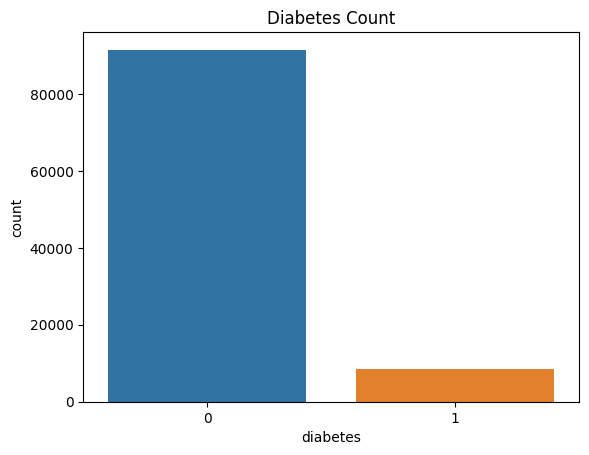

In [34]:
print(df['diabetes'].value_counts())

plt.title('Diabetes Count')
sns.countplot(data=df, x='diabetes');

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


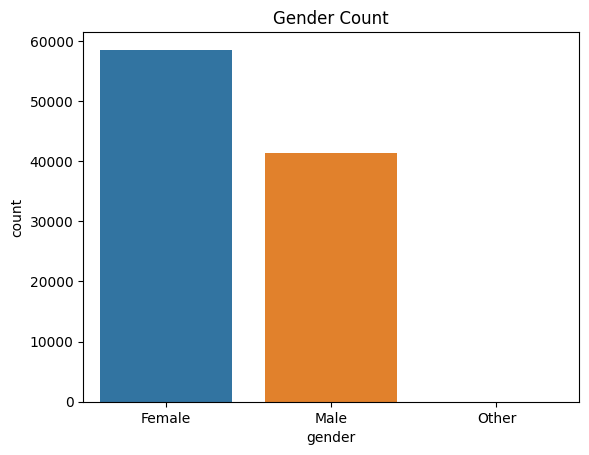

In [35]:
print(df['gender'].value_counts())

plt.title('Gender Count')
sns.countplot(data=df, x='gender');

hypertension
0    92515
1     7485
Name: count, dtype: int64


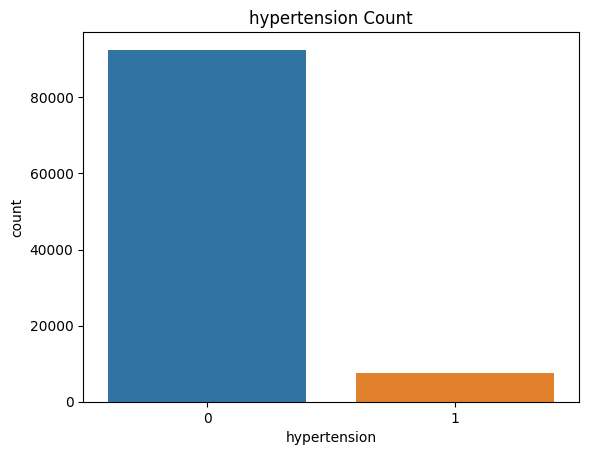

In [36]:
print(df['hypertension'].value_counts())

plt.title('hypertension Count')
sns.countplot(data=df, x='hypertension');

heart_disease
0    96058
1     3942
Name: count, dtype: int64


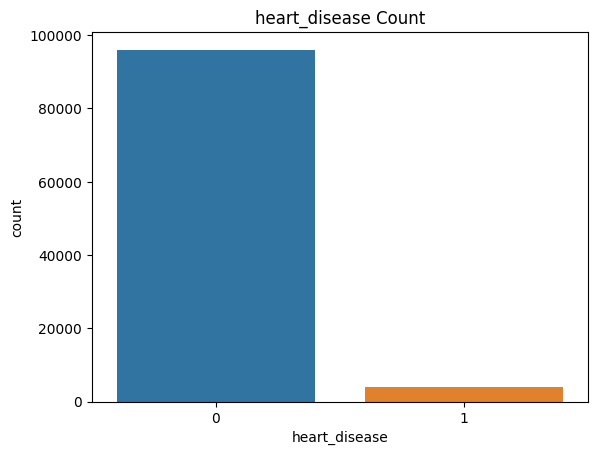

In [38]:
print(df['heart_disease'].value_counts())

plt.title('heart_disease Count')
sns.countplot(data=df, x='heart_disease');

BMI (Body Mass Index)

Description of the BMI column: 
count    96146.000000
mean        27.321461
std          6.767716
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64


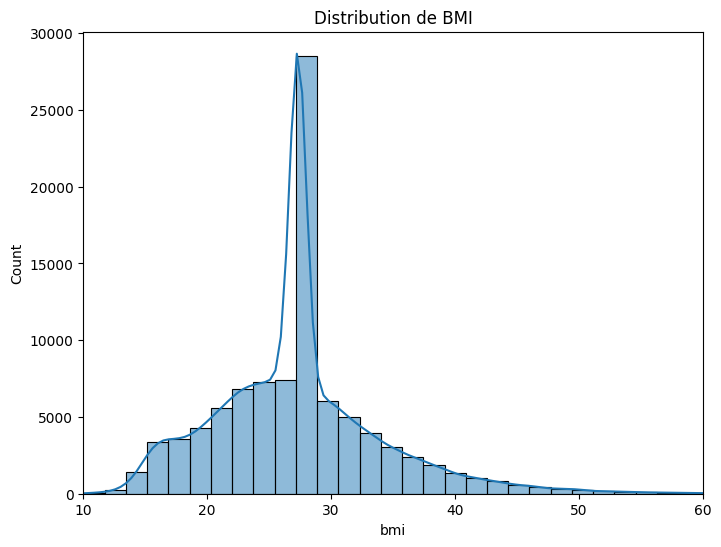

In [21]:
print(f"Description of the BMI column: \n{df['bmi'].describe()}")

# histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=50)
plt.xlim(10, 60)
plt.title('Distribution de BMI')
plt.show()


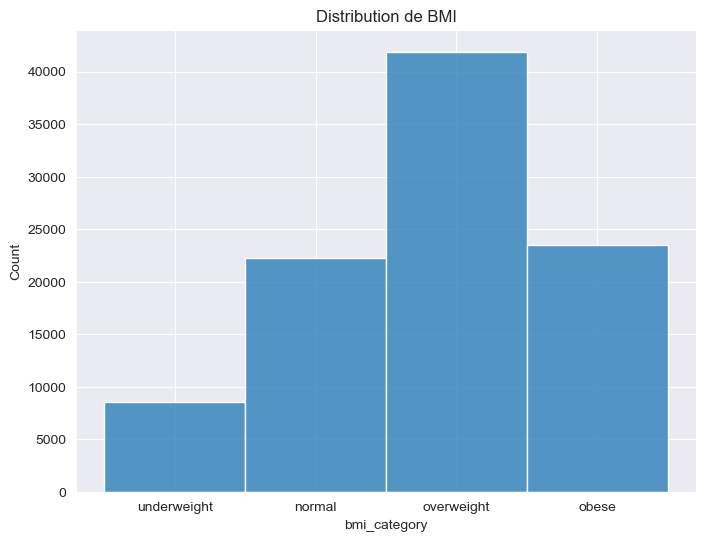

In [10]:
# ranges and labels for BMI value classifications, according to cancer.org
intervals = [0, 18.5, 25, 30, np.inf]
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=intervals,
                            labels=["underweight", "normal", "overweight", "obese"])

# Histogramme de la variable BMI
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi_category'], bins=len(intervals)-1)
plt.title('Distribution de BMI')
plt.show()

In [41]:
import numpy as np

bmi_values = df['bmi']
print("Résumé statistique du BMI :")
print(f"Moyenne : {np.mean(bmi_values):.2f}")
print(f"Écart-type : {np.std(bmi_values):.2f}")
print(f"Minimum : {np.min(bmi_values):.2f}")
print(f"25e percentile : {np.percentile(bmi_values, 25):.2f}")
print(f"Médiane : {np.median(bmi_values):.2f}")
print(f"75e percentile : {np.percentile(bmi_values, 75):.2f}")
print(f"Maximum : {np.max(bmi_values):.2f}")

Résumé statistique du BMI :
Moyenne : 27.32
Écart-type : 6.64
Minimum : 10.01
25e percentile : 23.63
Médiane : 27.32
75e percentile : 29.58
Maximum : 95.69


In [22]:
# Pourcentage of the values
df.bmi.value_counts(normalize=True).head(10)*100

bmi
27.32    22.534479
23.00     0.107129
27.12     0.105049
24.96     0.104008
27.80     0.104008
22.40     0.102968
25.00     0.102968
25.60     0.101928
24.50     0.097768
26.70     0.097768
Name: proportion, dtype: float64

In [25]:
filtered_df = df.query('bmi == 27.32')
sample_count = filtered_df.shape[0]
print("Number of samples with bmi equal to 27.32 :", sample_count)

Number of samples with bmi equal to 27.32 : 21666


age

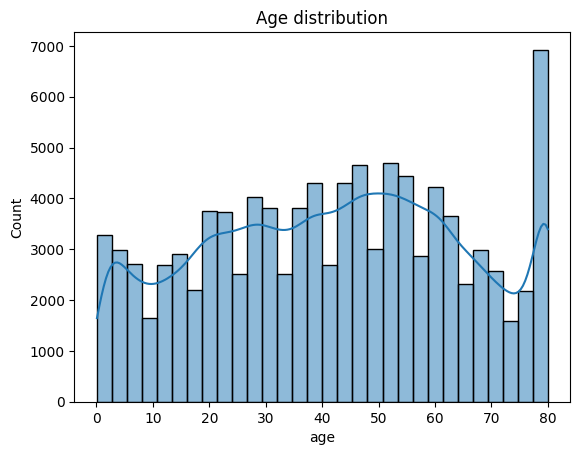

In [42]:
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age distribution')
plt.show()

smoking history

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64


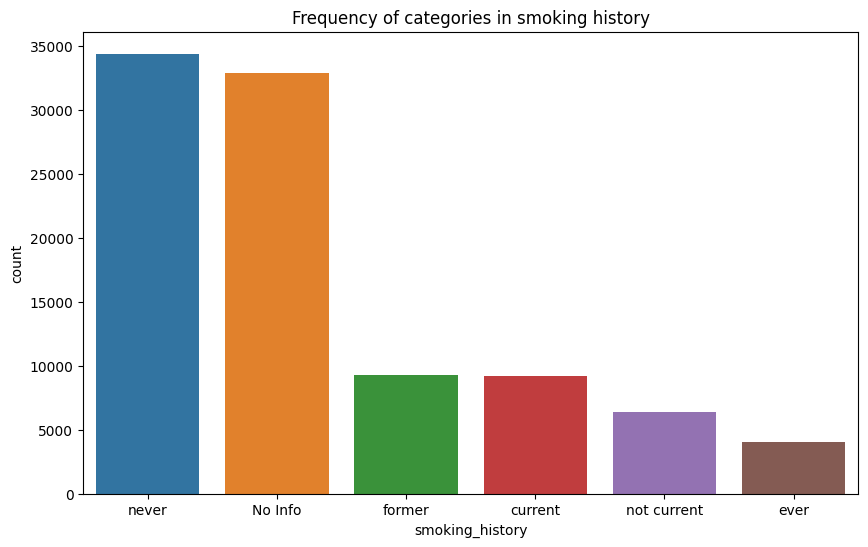

In [10]:
print(df['smoking_history'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Frequency of categories in smoking history')
plt.show()

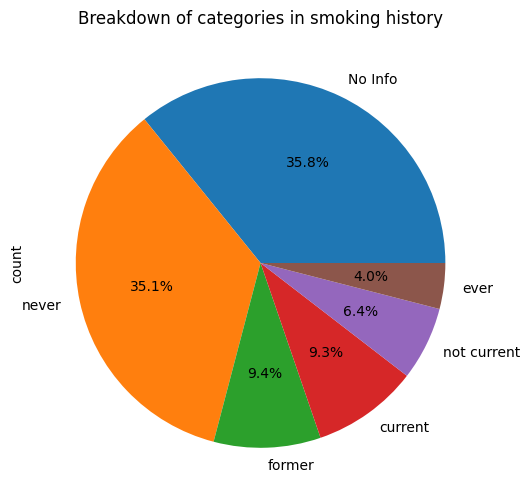

In [46]:
plt.figure(figsize=(10, 6))
df['smoking_history'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Breakdown of categories in smoking history')
plt.show()


blood glucose level

Number of unique values: 18
Total number of values: 96146


<Axes: title={'center': 'blood_glucose_level Count'}, xlabel='blood_glucose_level', ylabel='count'>

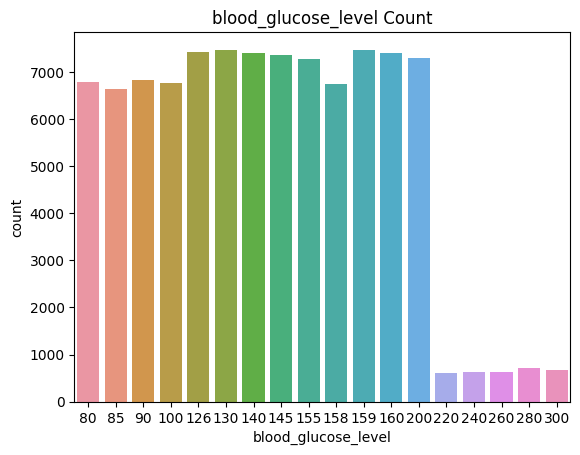

In [16]:
# print(df['blood_glucose_level'].value_counts())
print(f"Number of unique values: {df['blood_glucose_level'].nunique()}")
print(f"Total number of values: {df['blood_glucose_level'].count()}")

plt.title('blood_glucose_level Count')
sns.countplot(data=df, x='blood_glucose_level')

### Multi-variate Analysis

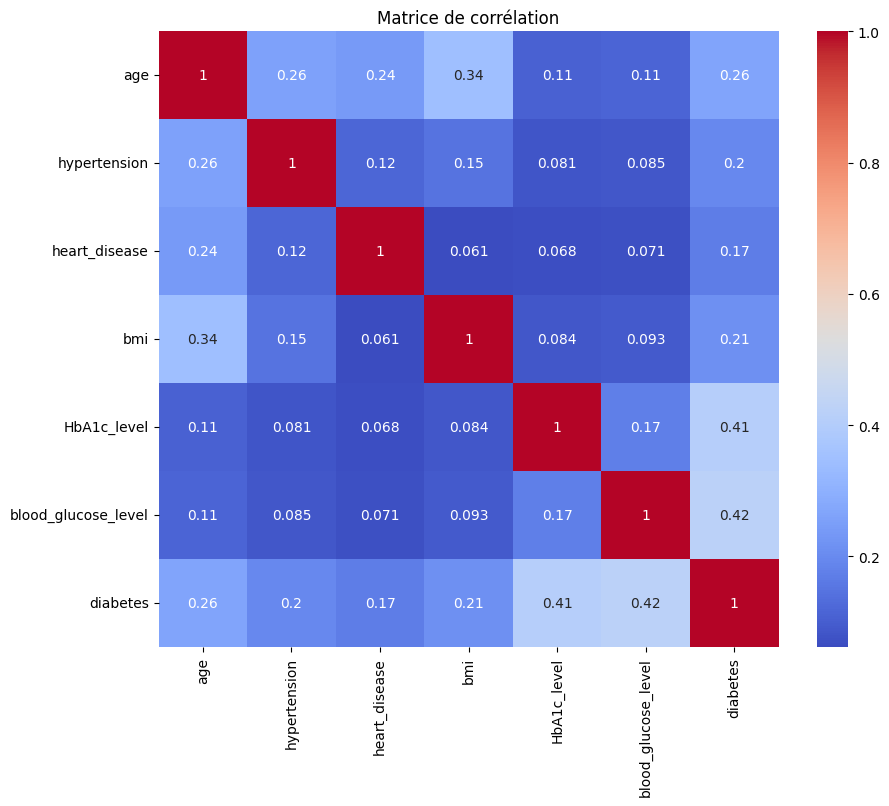

In [27]:
# Supposons que vous souhaitez exclure la colonne 'Gender' de la corrélation
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Sélectionne les colonnes numériques
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


age

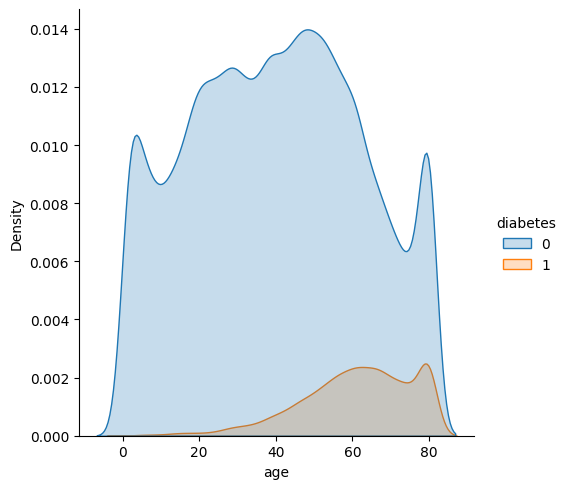

In [28]:
sns.displot(kind='kde', data=df, x='age', hue='diabetes', fill=True)

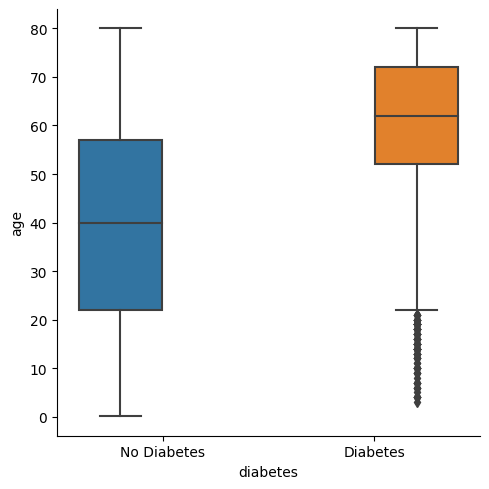

In [29]:
ax = sns.catplot(kind='box', data=df, x='diabetes', y='age',hue='diabetes')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

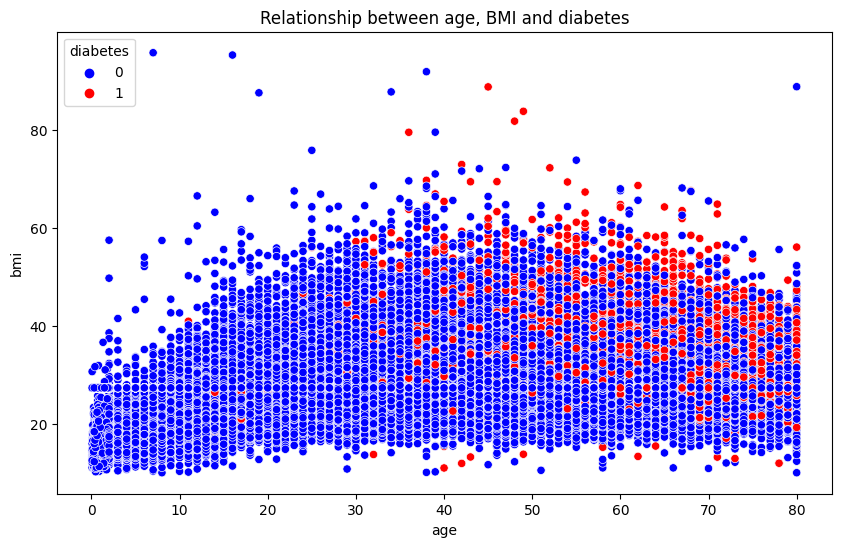

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', palette={0: 'blue', 1: 'red'}, data=df)
plt.title('Relationship between age, BMI and diabetes')
plt.show()

Diabetes and Gender column

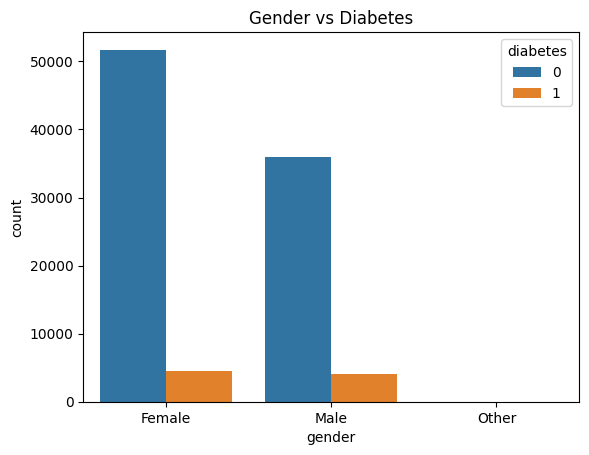

In [63]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

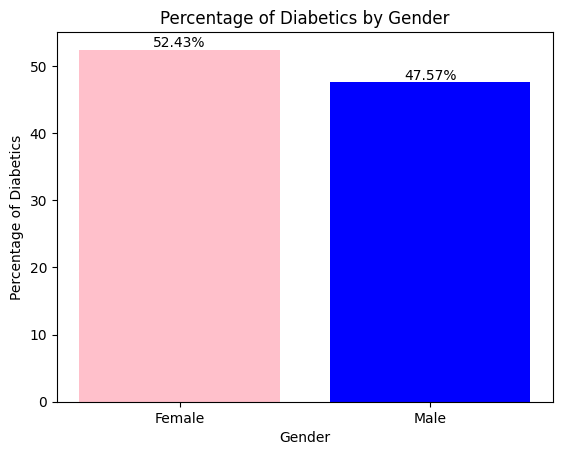

In [66]:
import matplotlib.pyplot as plt

# Filter diabetic individuals
diabetic_individuals = df[df['diabetes'] == 1]

# Calculate the number of diabetics by gender
diabetic_counts = diabetic_individuals['gender'].value_counts()

# Calculate the percentages
diabetic_percentages = (diabetic_counts / len(diabetic_individuals)) * 100

# Create the bar plot
colors = ['pink' if gender == 'Female' else 'blue' for gender in diabetic_percentages.index]
plt.bar(diabetic_percentages.index, diabetic_percentages, color=colors)

# Add bar labels
for i, val in enumerate(diabetic_percentages):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of Diabetics')
plt.title('Percentage of Diabetics by Gender')

# Display the plot
plt.show()

Number of females: 56161
Number of males: 39967
There are 16.84% more females than males.


<Axes: xlabel='diabetes', ylabel='gender'>

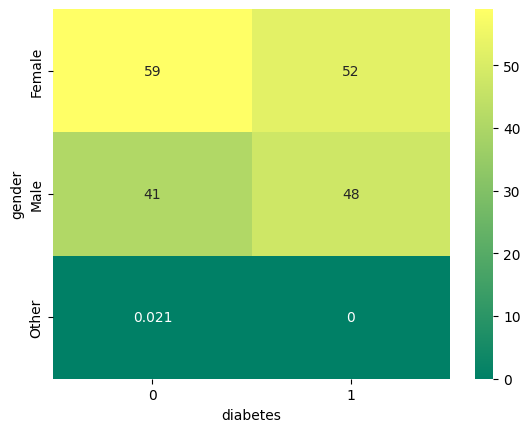

In [33]:
female_count = len(df[df['gender'] == 'Female'])
male_count = len(df[df['gender'] == 'Male'])
percentage_more_female = (female_count - male_count) / len(df) * 100

print(f"Number of females: {female_count}")
print(f"Number of males: {male_count}")
print(f"There are {percentage_more_female:.2f}% more females than males.")


temp_df = pd.crosstab(df['gender'], df['diabetes'], normalize='columns')*100
sns.heatmap(temp_df, annot=True, cmap='summer')



HbA1c levels

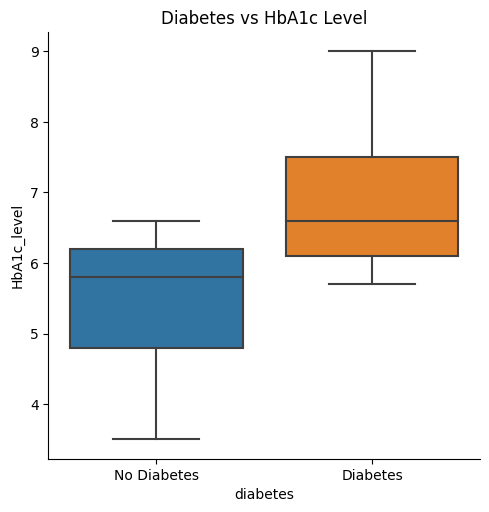

In [55]:
ax = sns.catplot(data=df, x='diabetes', y='HbA1c_level', kind='box')
ax.set(title='Diabetes vs HbA1c Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

In [59]:
# Create a new Boolean variable
df['high_blood_glucose'] = df['blood_glucose_level'] > 220

# Calculate the correlation coefficient
correlation = df['diabetes'].corr(df['high_blood_glucose'])
print('Correlation: ', correlation)


Correlation:  0.5427059962860199


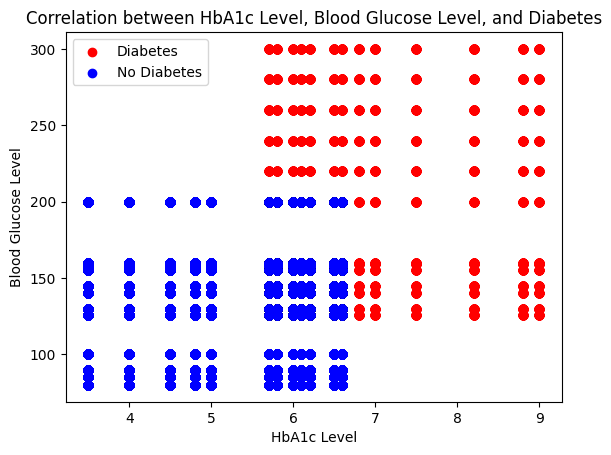

In [60]:
# Separating the data based on diabetes
diabetes_positive = df[df['diabetes'] == 1]
diabetes_negative = df[df['diabetes'] == 0]

# Creating the scatter plot
plt.scatter(diabetes_positive['HbA1c_level'], diabetes_positive['blood_glucose_level'], color='red', label='Diabetes')
plt.scatter(diabetes_negative['HbA1c_level'], diabetes_negative['blood_glucose_level'], color='blue', label='No Diabetes')

# Adding labels and title
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.title('Correlation between HbA1c Level, Blood Glucose Level, and Diabetes')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [61]:
# Filter the data based on the conditions
filtered_data = df[(df['HbA1c_level'] > 7) & (df['blood_glucose_level'] > 200)]

# Extract the values of HbA1c_level and blood_glucose_level
hbA1c_values = filtered_data['HbA1c_level']
blood_glucose_values = filtered_data['blood_glucose_level']
diabetes_presence = filtered_data['diabetes']

# Calculate the correlation
correlation = np.corrcoef(hbA1c_values, blood_glucose_values)[0, 1]

# Display the results
print("Correlation between HbA1c Level and Blood Glucose Level for individuals with HbA1c > 7 and blood glucose > 200:")
print(f"Correlation coefficient: {correlation:.2f}")
print(f"Presence of diabetes count: {diabetes_presence.sum()}")


Correlation between HbA1c Level and Blood Glucose Level for individuals with HbA1c > 7 and blood glucose > 200:
Correlation coefficient: 0.05
Presence of diabetes count: 971


Percentage of diabetics with blood glucose > 200: 38.48%
Percentage of diabetics with HbA1c > 7: 30.81%
Percentage of diabetes among individuals with HbA1c > 7 and blood glucose > 200:
Percentage of individuals with HbA1c > 7 and blood glucose > 200: 100.00


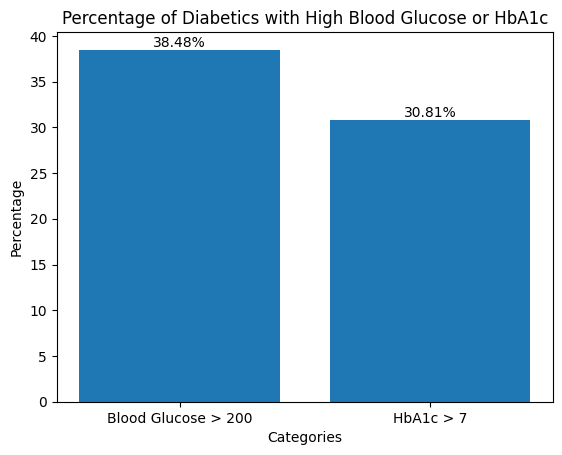

In [62]:
# Filter out diabetics with blood glucose > 200
diabetes_high_glucose = df[(df['diabetes'] == 1) & (df['blood_glucose_level'] > 200)]
percentage_diabetes_high_glucose = (len(diabetes_high_glucose) / len(df[df['diabetes'] == 1])) * 100
print(f"Percentage of diabetics with blood glucose > 200: {percentage_diabetes_high_glucose:.2f}%")

# Filter diabetic individuals with HbA1c > 7
diabetes_high_HbA1c = df[(df['diabetes'] == 1) & (df['HbA1c_level'] > 7)]
percentage_diabetes_high_HbA1c = (len(diabetes_high_HbA1c) / len(df[df['diabetes'] == 1])) * 100
print(f"Percentage of diabetics with HbA1c > 7: {percentage_diabetes_high_HbA1c:.2f}%")

# with and condition
diabetes_percentage = (diabetes_presence.mean()) * 100
print("Percentage of diabetes among individuals with HbA1c > 7 and blood glucose > 200:")
print(f"Percentage of individuals with HbA1c > 7 and blood glucose > 200: {diabetes_percentage:.2f}")


# Calculate the percentages
percentage_diabetes_high_glucose = (len(diabetes_high_glucose) / len(df[df['diabetes'] == 1])) * 100
percentage_diabetes_high_HbA1c = (len(diabetes_high_HbA1c) / len(df[df['diabetes'] == 1])) * 100

# Create the bar plot
categories = ['Blood Glucose > 200', 'HbA1c > 7']
percentages = [percentage_diabetes_high_glucose, percentage_diabetes_high_HbA1c]

plt.bar(categories, percentages)

# Add bar labels
for i, val in enumerate(percentages):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetics with High Blood Glucose or HbA1c')

# Display the plot
plt.show()

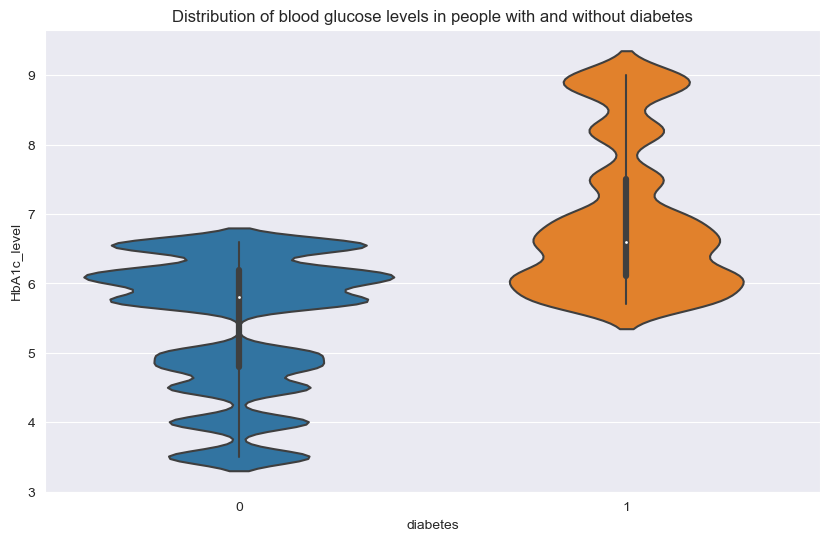

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='blood', data=df)
plt.title('Distribution of blood glucose levels in people with and without diabetes')
plt.show()

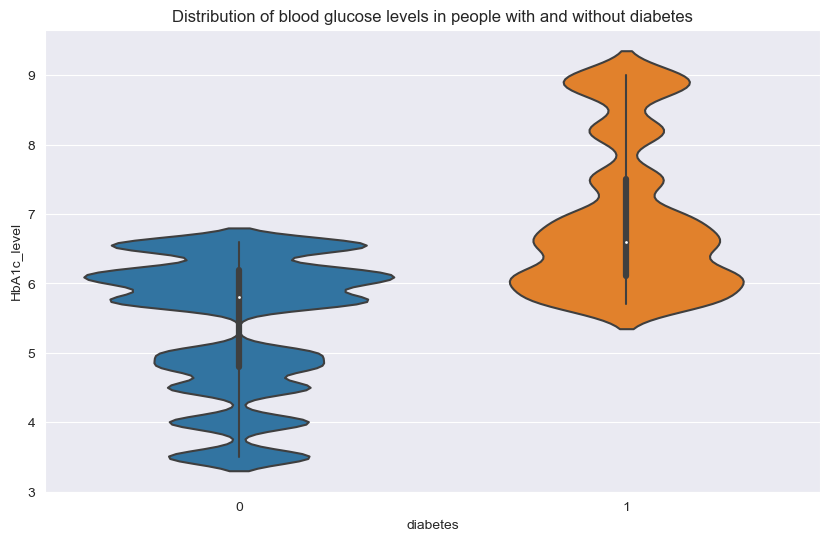

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('Distribution of blood glucose levels in people with and without diabetes')
plt.show()

Smoking history

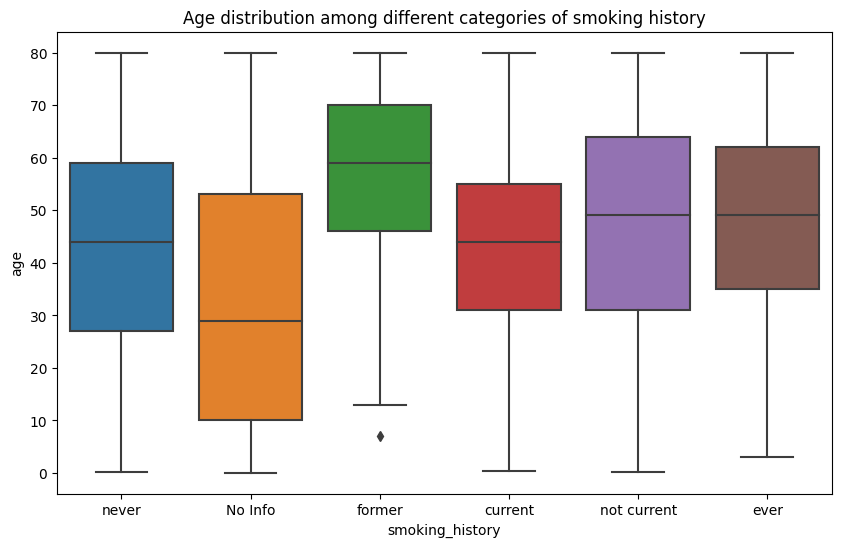

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='age', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Age distribution among different categories of smoking history')
plt.show()

BMI and Diabetes

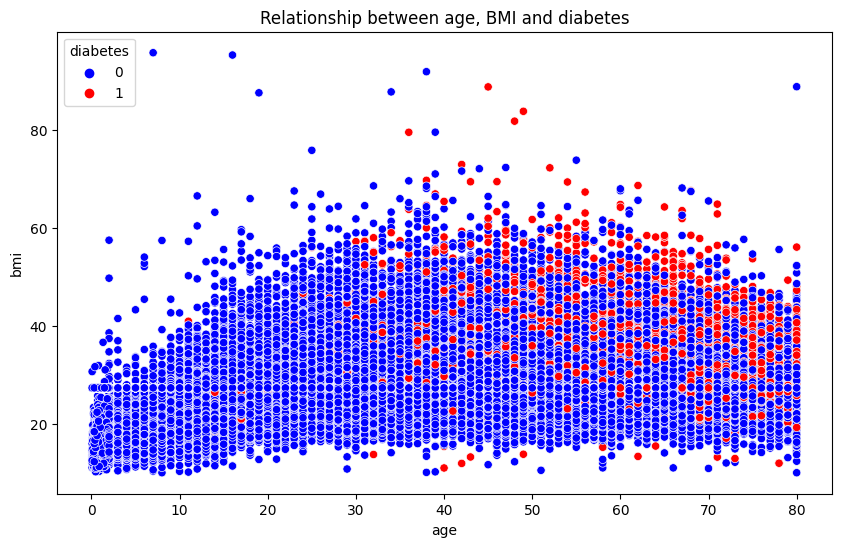

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', palette={0: 'blue', 1: 'red'}, data=df)
plt.title('Relationship between age, BMI and diabetes')
plt.show()

# Train part

## Encoding

In [71]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
 9   high_blood_glucose   96146 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(2)
memory usage: 9.4+ MB


Correlation:  0.5427059962860199
